# K means
Using K means to classify entire dataset based on director_facebook_likes and actor_3_facebook_likes

## Data collection

In [1]:
from copy import deepcopy
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()   # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# importing the dataset
data = pd.read_csv('movie_metadata.csv')
print(data.shape)
data.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## Data Wrangling

In [4]:
newdata = data.iloc[:, 4:6]

In [5]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [6]:
newdata.isnull().sum()

director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64

In [7]:
newdata.fillna(49, inplace=True)

In [8]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,49.0
...,...,...
5038,2.0,318.0
5039,49.0,319.0
5040,0.0,0.0
5041,0.0,489.0


## Creating model

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5)

In [11]:
# Fit the model
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [12]:
kmeans.cluster_centers_

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [13]:
print(kmeans.labels_)
print(len(kmeans.labels_))
set(kmeans.labels_)

[0 0 0 ... 0 0 0]
5043


{0, 1, 2, 3, 4}

In [14]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 104, 2: 87, 3: 11, 4: 66}


## Visualizing the final model

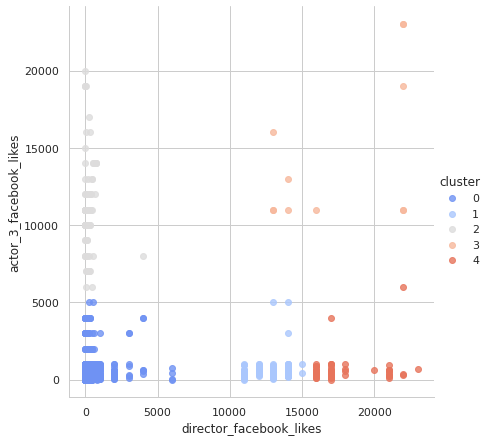

In [15]:
# plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes', y='actor_3_facebook_likes', data=newdata, hue='cluster',
          palette='coolwarm', height=6, aspect=1, fit_reg=False)